## Intro Python
### Modified from Justin Kitzes

Python works much like R, with variables and functions. Jupyter notebooks work much like R markdown. You can have chunks of markdown text and chunks of code. One difference in a notebook is that you can run each chunk separately. To run the code in a cell quickly, press Ctrl+Enter. To run the code in a cell and then proceed to the next cell, press Shift+Enter. The Help menu above lists more shortcuts under the Keyboard Shortcuts menu item. You can also use the buttons under the menu to delete cells (use the Cut button), create new ones, move cells, etc.

In [16]:
#an integer
anint = 3

#a string
astring = 'this is a string'

#a list
alistofint = [1,2,3]
alistofchars = ['a','b','c']

Use the print function to print the contents of a variable

In [17]:
print(alistofchars)

['a', 'b', 'c']


### Introducing logistic growth

Throughout this lesson, we will successively build towards a program that will calculate the logistic growth of a population of bacteria in a petri dish (or bears in the woods, if you prefer). Logistic growth produces a classic S shaped curve in which a population initially grows very fast, then slows down over time until it reaches a steady state value known as the carrying capacity.

For example, when there are only few bears in the woods and lots of food, they reproduce very fast. As the woods get full of bears and food gets harder to find, growth slows until the number of bears just balances with the amount of food (and hunters) in the woods, at which point the population stops growing.

A commonly used discrete time equation for logistic population growth is

$$ n_{t+1} = n_{t} + r n_{t} (1 - n_{t} / K) $$

where $n_t$ is the population size at time $t$, $r$ is the maximum net per capita growth rate, and $K$ is the carrying capacity of the dish/woods.

In [18]:
r = 0.3  # the maximum net per capita growth rate
K = 100 # carrying capacity of the environment
n0 = 10 # the population at time 0

We can calculate the population at $t = 1$ and $t = 2$

In [19]:
n1 = n0 + r*n0*(1 - n0/K) # calculate the population at time 1
n2 = n1 + r*n1*(1 - n1/K) # calculate the population at time 2

print(n0, n1, n2)

(10, 13.0, 16.393)


Once the number of variables that you are interested in starts getting large, working with them all individually starts to get unwieldy. To help stay organized, we can use collections of things.
There are many types of collections in Python. Here we'll look just at the most flexible and simplest container, the list. Lists are declared using square brackets []. You can get individual elements out of a list using by specifiying the name of the list and putting the position of the item of interest in brackets. Note that the first item in a python list is the 0 element, not the 1 element.

In [20]:
populationsize = [n0,n1,n2]
print('The population at time n0 = ',populationsize[0])

('The population at time n0 = ', 10)


You can also access a range of elements in a list starting with the first element named and ending with the last element, but not including it.

In [21]:
print(populationsize[0:2]) #prints items 0-1
print(populationsize[1:]) #prints items 1 through the end
print(populationsize[-1]) #prints the last item (negatives count backward from the end)

[10, 13.0]
[13.0, 16.393]
16.393


It is useful to manipulate lists by adding to them.

In [22]:
n3 = n2 + r*n2*(1 - n2/K) # calculate the population at time 3
populationsize.append(n3)
print(populationsize)

[10, 13.0, 16.393, 20.504708653]


Note that to append an item to a list we put the function append at the end of the name of the variable. In Python, all types of variables are "objects". In the simplest terms, you can think of an object as a small bundled "thing" that contains within itself both data and functions that operate on that data. For example, strings in Python are objects that contain a set of characters and also various functions that operate on the set of characters. When bundled in an object, these functions are called "methods". The reason to bundle a function up as a method, instead of making it free floating, is that it makes it clear what kind of variable the function can operate on.
Instead of the "normal" function(arguments) syntax, methods are called using the syntax variable.method(arguments). Think of the '.' as short for "look inside".

Another example is to remove the last item of the list.

In [23]:
new_n3 = populationsize.pop()
print(new_n3)
print(populationsize)

20.504708653
[10, 13.0, 16.393]


Calculating the population for each generation by hand is obviously time consuming. Fortunately we have already seen for loops. Let's implement one here to calculate the population for 100 generations.

In [24]:
populationsize = []  #an empty list
n = 10 # the initial population size

for i in range(100):  # the range function provides a list to iterate through from 0 up to but not including 100
    populationsize.append(n) # add pop size to list
    n = round(n + r*n*(1 - n/K))  #calculate the next generation n (use the round function to do some rounding)
    
print(populationsize)

[10, 13.0, 16.0, 20.0, 25.0, 31.0, 37.0, 44.0, 51.0, 58.0, 65.0, 72.0, 78.0, 83.0, 87.0, 90.0, 93.0, 95.0, 96.0, 97.0, 98.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0]


Once we start really generating useful and large collections of data, it becomes unwieldy to inspect our results manually. We can load some plotting functions to show our data.

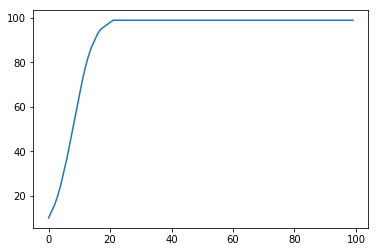

In [25]:
# Jupyter notebook command to load plotting functions
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(populationsize)

### Adding some randomness to the model
Let's introduce some element of randomness into our population growth model. We'll model a simple "catastrophe" process, in which a catastrophe happens in 10% of the time steps that reduces the population back down to the initial size. We create a TRUE/FALSE variable (a boolean) that will be True if a catastrophe has occurred, and False if it hasn't. A simple way to do this is to generate a pseudorandom number between 0 and 1 using `random` function in the `random` package. Check whether this number is less than 0.1 - this check will be True 10% of the time.
We add an if statement to the for loop that checks whether catastrophe is true in each time step. If it is true, set the population back to the initial size. Otherwise, perform the usual logistic growth calculation. We can plot our results. Run the cell again to see a different random population growth path.


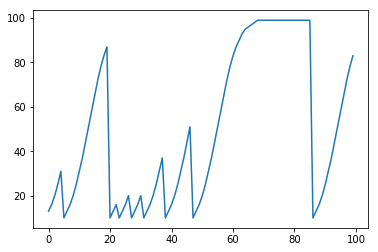

In [26]:
from random import random  #this imports a function (random) to randomly select a value between 0 and 1

populationsize = []  #an empty list
n0 = 10 # the initial population size
n = n0 # set the current population size

for i in range(100):
    catastrophe = (random() < 0.1)  # Random catastrophe 10% of time - results in either TRUE or FALSE
    if catastrophe:  #check if it equals TRUE
        n = n0        
    else:
        n = round(n + r*n*(1 - n/K))
    populationsize.append(n)
    
plt.plot(populationsize)

Now that we have a process to examine population growth, let's "put it away" in a function.

In [30]:
def plot_pop():
    
    populationsize = []  #an empty list
    n0 = 10 # the initial population size
    n = n0 # set the current population size

    for i in range(100):
        catastrophe = (random() < 0.1)  # Random catastrophe 10% of time - results in either TRUE or FALSE
        if catastrophe:  #check if it equals TRUE
            n = n0        
        else:
            n = round(n + r*n*(1 - n/K))
        populationsize.append(n)

    plt.plot(populationsize)

We can then run our function

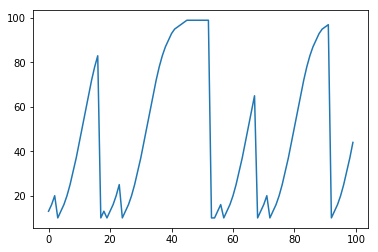

In [31]:
plot_pop()

Now let's generalize the function to take other values. For example we can specify the initial population size when we call the function.

In [32]:
def plot_pop(n0):
    
    populationsize = []  #an empty list
    n = n0 # set the current population size

    for i in range(100):
        catastrophe = (random() < 0.1)  # Random catastrophe 10% of time - results in either TRUE or FALSE
        if catastrophe:  #check if it equals TRUE
            n = n0        
        else:
            n = round(n + r*n*(1 - n/K))
        populationsize.append(n)

    plot(populationsize)

We can also return values from a function

[10, 13.0, 16.0, 20.0, 25.0, 31.0, 37.0, 44.0, 10, 13.0, 16.0, 10, 13.0, 16.0, 20.0, 25.0, 10, 13.0, 16.0, 20.0, 25.0, 31.0, 37.0, 44.0, 51.0, 58.0, 10, 13.0, 16.0, 20.0, 25.0, 31.0, 10, 13.0, 16.0, 20.0, 25.0, 31.0, 37.0, 44.0, 51.0, 58.0, 65.0, 72.0, 78.0, 83.0, 87.0, 90.0, 93.0, 95.0, 96.0, 97.0, 98.0, 99.0, 99.0, 99.0, 99.0, 10, 13.0, 16.0, 20.0, 25.0, 31.0, 37.0, 10, 13.0, 16.0, 20.0, 25.0, 31.0, 37.0, 44.0, 51.0, 58.0, 65.0, 72.0, 78.0, 83.0, 87.0, 90.0, 93.0, 95.0, 96.0, 97.0, 10, 13.0, 16.0, 20.0, 25.0, 31.0, 37.0, 44.0, 51.0, 58.0, 65.0, 10, 10, 13.0, 16.0, 20.0]


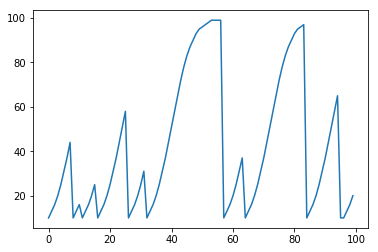

In [34]:
def plot_pop(n0):
    
    populationsize = []  #an empty list
    n = n0 # set the current population size

    for i in range(100):
        populationsize.append(n)
        catastrophe = (random() < 0.1)  # Random catastrophe 10% of time - results in either TRUE or FALSE
        if catastrophe:  #check if it equals TRUE
            n = n0        
        else:
            n = round(n + r*n*(1 - n/K))

    plt.plot(populationsize)
    
    return populationsize

pop_size = plot_pop(10)
print(pop_size)

### Challenge
Change the function so that you can specify r and K

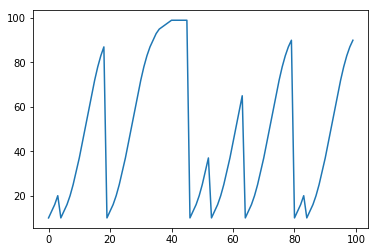

In [36]:
def plot_pop(n0,r,K):
    
    populationsize = []  #an empty list
    n = n0 # set the current population size

    for i in range(100):
        populationsize.append(n)
        catastrophe = (random() < 0.1)  # Random catastrophe 10% of time - results in either TRUE or FALSE
        if catastrophe:  #check if it equals TRUE
            n = n0        
        else:
            n = round(n + r*n*(1 - n/K))

    plt.plot(populationsize)
    
    return populationsize

pop_size = plot_pop(10,.3,100)

Consider that there is stochasticity in real data. That means that the actual population size probably won't be what you calculated. We can add this stochasticity to our population by multiplying our calculated population size by a value drawn from a normaldistribution.

In [41]:
from random import normalvariate

To know what this function does and how it is used we can ask for help

In [44]:
help(normalvariate)

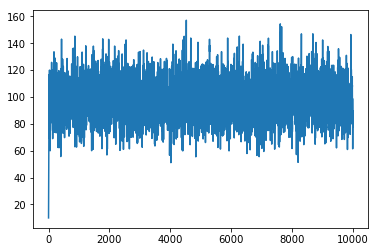

In [37]:
def plot_pop(n0,g):
    
    populationsize = []  #an empty list
    n = n0 # set the current population size

    for i in range(g):
        populationsize.append(n)   
        n = round(n + r*n*(1 - n/K))
        n = n*normalvariate(1, .1)

    plt.plot(populationsize)
    
    return populationsize

pop_size = plot_pop(10,10000)

Having the help function for a function is useful. Let's add this information for our function as well

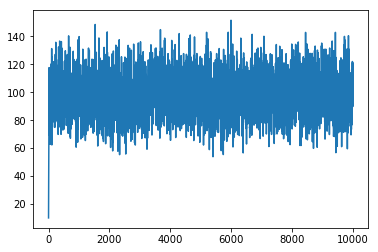

In [43]:
def plot_pop(n0,g):
    """
    Plots the population given logistic growth
    Args:
        n0: int for initial population size
        g: int of number of generations to calculate
    """
    populationsize = []  #an empty list
    n = n0 # set the current population size

    for i in range(g):
        populationsize.append(n)   
        n = round(n + r*n*(1 - n/K))
        n = n*normalvariate(1, .1)

    plt.plot(populationsize)
    
    return populationsize

pop_size = plot_pop(10,10000)